<img src="https://drive.google.com/uc?id=1xZ4bHsFuk8oiEcWpX8YlT5jFdnkhSxLw" style="width: 100%;" />
<!--<img src="img/ucl_header.png" style="width: 100%;" />-->
<br /><br /><br />

<h2 style="text-align: center; font-size: 5rem; margin-top: 0;">MSIN0221:</h2>
<h1 style="text-align: center; font-size: 8rem; margin-top: 4px;">Individual Assignment</h1>
<br /><br /><br />

<div>
    <img src="https://drive.google.com/uc?id=12YWZTkqdD8rgOBnTedQMFZy4xvPzbs0o" style="float: left;" />
    <!--<img src="img/ucl_som_logo.png" style="float: left;" />-->
    <div>
        <p style="text-align: right; font-weight: bold;">
            Max Bartolo<br />
            <a href="https://maxbartolo.com" target="_blank">https://maxbartolo.com</a><br />
            <a href="https://twitter.com/max_nlp" target="_blank">@max_nlp</a>
        </p>
    </div>
</div>

<hr />

# Individual Assignment
The individual assignment is designed to support your learning as you navigate through the first half of this course. 

The total number of marks available for this assignment is 100, which will constitute 40% of the overall score for this module.

## Instructions

1.   Make a copy of this notebook 
  - Click on "File -> Save a copy in Drive" and open it in Colab afterwards
  - **Not recommended!**: Alternatively, download the notebook and work on it on your local machine though keep in mind that you will have to make sure it still runs on Colab afterwards and does not depend on any packages that you installed locally
2.   Rename your notebook to **surname-forename-studentnumber.ipynb**
  - Make sure to exactly follow this naming scheme (don't replace `-` with `_` or something like that)
  - **Failure to comply with this scheme will result in -10 marks!**
3.   For math exercises, use $\LaTeX$  to typset your answer
4.   For coding exercises, insert your code at `# TODO` statements
5.   For multiple-choice questions, choose an answer from the drop-down list
6.   Before submitting your notebook, **make sure that it runs without errors when executed from start to end on Colab**
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell
  - **If your notebook throws any errors, you will be penalized by -25 marks in addition to any penalities from incorrect answers**
  - You are responsible for delivering a fully functional notebook (as you would be in a business presentation setting). We won't be fixing any errors (no matter how small) to make your code work
7.  Download your notebook and submit it on Moodle
  - Click on "File -> Download .ipynb"
  



## Notebook Setup

In [1]:
# Imports [don't change this cell!]
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import sklearn
import string
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import os
import sys
IN_COLAB = 'google.colab' in sys.modules

# Set the random seed for reproducibility
RAND_SEED = 27
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)

In [2]:
# Your Imports [import any other libraries you need in this cell]
# Import spacy for tokenisation
import spacy
# try:
#     nlp = spacy.load("en_core_web_md")
# except OSError:
#     import spacy.cli 
#     print("Model not found. Downloading.")
#     spacy.cli.download("en_core_web_md")
#     import en_core_web_md
#     nlp = en_core_web_md.load()
# Show spaCy stopwords
from spacy.lang.en.stop_words import STOP_WORDS
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm

import torch
torch.manual_seed(RAND_SEED)  # set for reproducibility
from sklearn.model_selection import train_test_split
# Load the data using torchtext
import torchtext
print(f"torchtext version is {torchtext.__version__}")

if torchtext.__version__ >= '0.9':
  from torchtext.legacy import data
  from torchtext.legacy.data import Field, Dataset, Example
else:
  from torchtext import data
  from torchtext.data import Field, Dataset, Example



torchtext version is 0.9.0


<hr />

## Q1: Text Preprocessing [5 marks]

### Q1.1: Tokenisation [3 marks]
Create a function called `word_tokenize` to split input text into tokens separated by any whitespace character, or punctuation character (as listed in Python's `string.punctuation`).

For example, the following input:

`Pre-processing is useful to most NLP algorithms -- it allows us to transform text into a more digestible format for models.`

should be transformed into:

`['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']`


In [3]:
#TODO: complete the function below
def word_tokenize(text: str) -> list:
  text = re.findall(r"\w+|[^\w\s]", text)
  return text



input_text = "Pre-processing is useful to most NLP algorithms -- it allows us to transform text into a more digestible format for models."
print(word_tokenize(input_text))

['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']


### Q1.2: Remove stopwords [2 marks]
Create a function called `remove_stopwords` to remove the stopwords `['a', 'in', 'to', 'as', 'for', 'the']` from an input list of tokens.

For example, the following input:

`['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']`

should be transformed into:

`['Pre', '-', 'processing', 'is', 'useful', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'transform', 'text', 'into', 'more', 'digestible', 'format', 'models', '.']`


In [4]:
#TODO: complete the function below
def remove_stopwords(tokens: list) -> list:
  stopwords = ['a', 'in', 'to', 'as', 'for', 'the']
  return[w for w in tokens if not w in stopwords]

  
  

input_tokens = ['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']
print(remove_stopwords(input_tokens))

['Pre', '-', 'processing', 'is', 'useful', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'transform', 'text', 'into', 'more', 'digestible', 'format', 'models', '.']


<hr />

## Q2: Feature Exploration [20 marks]

In [5]:
# This cell loads the SST-2 dataset [do not change!]
path_train = "https://drive.google.com/uc?id=1IsO72aOzjx-6eu2Z5VOaXZBShatNxBaj"
path_dev = "https://drive.google.com/uc?id=1tUiTEzR14wmYTdr0mYEKaDbj9-pN05-u"

# Load in the train and dev data
df_train = pd.read_csv(path_train, sep='\t')
df_dev = pd.read_csv(path_dev, sep='\t')
# We'll split df_dev into a validation and test set for the purposes of this assignment
df_dev, df_test = df_dev[:400], df_dev[400:]

# Quick look at the training data
pd.set_option('max_colwidth', 1000)
df_train[:10]


,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates something rather beautiful about human nature,1
3,remains utterly satisfied to remain the same throughout,0
4,on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0
5,that 's far too tragic to merit such superficial treatment,0
6,"demonstrates that the director of such hollywood blockbusters as patriot games can still turn out a small , personal film with an emotional wallop .",1
7,of saucy,1
8,a depressed fifteen-year-old 's suicidal poetry,0
9,are more deeply thought through than in most ` right-thinking ' films,1


### Q2.1: Distinguish "good" from "bad" [2 marks]
Create a function called `is_good` to identify whether either of the words `['good', 'nice', 'love']` occur in a text string. The function should return `1` if any of the words are present, and `0` otherwise. Make sure that you only match the complete words (for example, if the word `loves` occurs, the function should return `0`).

Create another function called `is_bad` to identify whether either of the words `['bad', 'ugly', 'boring']` occur in a text string. The function should return `1` if any of the words are present, and `0` otherwise.


In [6]:
#TODO: complete the function below
def is_good(text: str) -> int:
  good_words = ['good', 'nice', 'love']
  tokenised_text = text.split()
  check = [w for w in tokenised_text if not w in good_words]
  if check == tokenised_text:
    return 0
  else:
    return 1


input_text = "that loves its characters and communicates something rather beautiful about human nature"
print(input_text)
print(is_good(input_text))  # should print 0

input_text = "I love NLP"
print(input_text)
print(is_good(input_text))  # should print 1

that loves its characters and communicates something rather beautiful about human nature
0
I love NLP
1


In [7]:
#TODO: complete the function below
def is_bad(text: str) -> int:
  bad_words = ['bad', 'ugly', 'boring']
  tokenised_text = text.split()
  check = [w for w in tokenised_text if not w in bad_words]
  if check == tokenised_text:
    return 0
  else:
    return 1
  
  

input_text = "that loves its characters and communicates something rather beautiful about human nature"
print(input_text)
print(is_bad(input_text))  # should print 0

input_text = "lockdowns can be boring but learning NLP totally makes up for it"
print(input_text)
print(is_bad(input_text))  # should print 1



that loves its characters and communicates something rather beautiful about human nature
0
lockdowns can be boring but learning NLP totally makes up for it
1


 
### Q2.2: Logistic Regression [3 marks]
Train a Logistic Regression model (feel free to use scikit-learn) using the `is_good()` and `is_bad()` functions as features. For example, the input sentence `I love NLP` would be featurised as the vector `[1, 0]` since `is_good()` will return `1` and `is_bad()` will return 0.

Report your results (accuracy) on the training set and the validation set.

In [8]:
#TODO: complete the function below
#insipration from notebook 9 on neural networks 

# Logistic sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class LogisticRegression():
    def __init__(self, rand_seed=RAND_SEED):
        self.rand_seed = rand_seed
        np.random.seed(self.rand_seed)  # set the random seed for reproducibility
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b = np.random.randn()
        
    def forward(self, x1: int, x2: int) -> int:
        weighted_sum = self.w1*x1 + self.w2*x2 + self.b
        activation = sigmoid(weighted_sum)
        return activation


#Combine function
def good_or_bad(text):
  is_good_is_bad = [is_good,is_bad]
  return np.array([function(text)for function in is_good_is_bad])
 

#apply functions 
df_train["good or bad"] = df_train["sentence"].apply(good_or_bad)
df_dev["good or bad"] = df_dev["sentence"].apply(good_or_bad)


# Get probabilities of class = 1 i.e. positive for training
model = LogisticRegression()
training_probabilities = []
for x1, x2 in df_train["good or bad"]:
    prob = model.forward(x1, x2)
    training_probabilities.append(prob)

# Get probabilities of class = 1 i.e. positive for dev 
model = LogisticRegression()
dev_probabilities = []
for x1, x2 in df_dev["good or bad"]:
    prob = model.forward(x1, x2)
    dev_probabilities.append(prob)

# predictions by applying our threshold
threshold = 0.5
training_predictions = [1 if p >= 0.5 else 0 for p in training_probabilities]
dev_predictions = [1 if p >= 0.5 else 0 for p in dev_probabilities]

# Compute the accuracy score
def accuracy(y_true: list, y_pred: list) -> int:
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length"
    num_correct = 0
    for y_t, y_p in zip(y_true, y_pred):
        if y_t == y_p:
            num_correct += 1
    return 100*num_correct / len(y_true)

training_model_acc = accuracy(df_train["label"], training_predictions)
print("The training model's accuracy score is {:.2f}%".format(training_model_acc))

dev_model_acc = accuracy(df_dev["label"], dev_predictions)
print("The development model's accuracy score is {:.2f}%".format(dev_model_acc))











The training model's accuracy score is 55.78%
The development model's accuracy score is 52.00%


### Q2.3: Develop your own features [5 marks]
Develop your own feature functions and use them to train a Logistic Regression model. Describe the intuition behind any of the features you create, and make sure to show explanations and code for all interesting features you come up with, even if they don't make it to the final feature selection you use to train your model.

Report your results (accuracy) on the training set and the validation set.

- Removal of stop words (Do we want to keep all the tokens in the list? We don't. In fact, we want to remove all the words that don’t provide additional information.)
- Now that we have all the useful tokens, we can apply word transformations. Stemming and Lemmatization both generate the root form of words
- It’s important to have a look at the length of the text because it’s an easy calculation that can give a lot of insights. Maybe, for instance, we are lucky enough to discover that one category is systematically longer than another and the length would simply be the only feature needed to build the model.
- convert to lower case as we dont want model to generate new tokens for a word in good() or bad() simply because it is in capital 
- add word frequency as a feature in your dataframe. We just need the CountVectorizer from Scikit-learn

In [9]:
# Load the opinion lexicon
# Define where the data is located
DATA_DIR = "data/opinion-lexicon-en/"
path_pos_words = os.path.join(DATA_DIR, 'positive-words.txt')
path_neg_words = os.path.join(DATA_DIR, 'negative-words.txt')

if IN_COLAB:
    path_pos_words = "uc?id=15nUrNvPy0a9hpBStZ1rjZvU5I73glhVs"
    path_neg_words = "uc?id=1nlCloWzQ_SeI5jpptBgWX5GOjkmsJvMx"
    if not os.path.exists(path_pos_words):
      # If the files don't exist, download them from drive
      !wget https://drive.google.com/uc?id=15nUrNvPy0a9hpBStZ1rjZvU5I73glhVs
      !wget https://drive.google.com/uc?id=1nlCloWzQ_SeI5jpptBgWX5GOjkmsJvMx

# Load in the train and dev data
with open(path_pos_words, 'r', encoding='ISO-8859-1') as f:
    POS_WORDS = set([u''+word.strip()+'' for word in f.readlines()[30:]])
with open(path_neg_words, 'r', encoding='ISO-8859-1') as f:
    NEG_WORDS = set([u''+word.strip()+'' for word in f.readlines()[31:]]) 

print("Loaded {} positive and {} negative words.".format(len(POS_WORDS), len(NEG_WORDS)))
print("Example positive words: {}".format(list(POS_WORDS)[:6]))
print("Example negative words: {}".format(list(NEG_WORDS)[:6]))

--2021-03-23 19:58:13--  https://drive.google.com/uc?id=15nUrNvPy0a9hpBStZ1rjZvU5I73glhVs
Resolving drive.google.com (drive.google.com)... 108.177.119.100, 108.177.119.139, 108.177.119.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nfg3147phrh84mm4rcefut2p04inq0f8/1616529450000/04136828060170594848/*/15nUrNvPy0a9hpBStZ1rjZvU5I73glhVs [following]
--2021-03-23 19:58:14--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nfg3147phrh84mm4rcefut2p04inq0f8/1616529450000/04136828060170594848/*/15nUrNvPy0a9hpBStZ1rjZvU5I73glhVs
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)|1

In [10]:
#TODO: your code goes here
import sklearn.linear_model as lm
#Define Feature Functions
#tokenise
def tokenise(text):
    return text.split()
# Number of stopwords
def num_stopwords(tokens):
  return len([token for token in tokens if token in STOP_WORDS])

#sentence length
def text_len(tokens):
    return len(" ".join(tokens))
#sentence positivity ... positive and negative words are loaded in cell above
def positivity(tokens):
    score = 0
    for token in tokens:
        if token in POS_WORDS:
            score += 1
        if token in NEG_WORDS:
            score -= 1
    return score



#Apply functions to extract features to training set 
df_train['Tokenised sentence'] = df_train['sentence'].apply(tokenise)
df_train['text length'] = df_train['Tokenised sentence'].apply(text_len)
df_train['positivity'] = df_train['Tokenised sentence'].apply(positivity)
df_train['Number stopwords'] = df_train['Tokenised sentence'].apply(num_stopwords)

#define X and Y train sets
X_train = df_train.drop(['label','sentence','good or bad','Tokenised sentence'], axis=1)
y_train = df_train['label']

#fit model on training set 
log_reg = lm.LogisticRegression()
log_reg.fit(X_train, y_train)

#evaluate model performance on training set 
y_train_pred = log_reg.predict(X_train)
accuracy = accuracy_score(y_train,y_train_pred)
print("Training Accuracy is {:.2f}%".format(100*accuracy))

#Apply Functions to extract features to dev set 
df_dev['Tokenised sentence'] = df_dev['sentence'].apply(tokenise)
df_dev['text length'] = df_dev['Tokenised sentence'].apply(text_len)
df_dev['positivity'] = df_dev['Tokenised sentence'].apply(positivity)
df_dev['Number stopwords'] = df_dev['Tokenised sentence'].apply(num_stopwords)

#define X and Y dev sets
X_dev = df_dev.drop(['label','sentence','good or bad','Tokenised sentence'], axis=1)
y_dev = df_dev['label']

#Evaluate model performance on dev set 
y_dev_pred = log_reg.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print("Development Set Accuracy is {:.2f}%".format(100*dev_accuracy))








Training Accuracy is 72.18%
Development Set Accuracy is 69.75%


In [11]:
df_train.head()

,sentence,label,good or bad,Tokenised sentence,text length,positivity,Number stopwords
0,hide new secretions from the parental units,0,"[0, 0]","[hide, new, secretions, from, the, parental, units]",43,0,2
1,"contains no wit , only labored gags",0,"[0, 0]","[contains, no, wit, ,, only, labored, gags]",35,0,2
2,that loves its characters and communicates something rather beautiful about human nature,1,"[0, 0]","[that, loves, its, characters, and, communicates, something, rather, beautiful, about, human, nature]",88,2,6
3,remains utterly satisfied to remain the same throughout,0,"[0, 0]","[remains, utterly, satisfied, to, remain, the, same, throughout]",55,0,4
4,on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0,"[0, 0]","[on, the, worst, revenge-of-the-nerds, clichés, the, filmmakers, could, dredge, up]",72,-1,5


### Q2.4: TFIDF [2 marks]
Train a Logistic Regression model on the TFIDF representations of the input texts.

Report your results (accuracy) on the training set and the validation set.

In [12]:
#TODO: your code goes here

#define X and Y train sets
x_train, y_train = df_train['sentence'].values, df_train['label'].values
x_dev, y_dev = df_dev['sentence'].values, df_dev['label'].values #sentence and label are columns

#Define TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(x_train)
# Then we convert train and dev to BOW... all th sentences we saw before will become a count of each word 
x_train = vectorizer.transform(x_train)
x_dev = vectorizer.transform(x_dev)

# Extract the trained vocab
vocab = vectorizer.get_feature_names()
print("{} tokens in vocab".format(len(vocab)))
print()


#Define the model
log_reg = lm.LogisticRegression()
# Train the model
log_reg.fit(x_train, y_train);


# Get the model predictions on the train and dev set
y_pred_train = log_reg.predict(x_train)
y_pred_dev = log_reg.predict(x_dev)
# Evaluate model accuracy 
y_pred_dev_proba = log_reg.predict_proba(x_dev) # this will create model probabilities

# Evaluate the model accuracy
acc_train = 100 * accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_dev = 100 * accuracy_score(y_true=y_dev, y_pred=y_pred_dev)
acc_dev_reference = acc_dev  

print("Accuracy score on train is {:.2f}%".format(acc_train))
print("Accuracy score on dev is {:.2f}%".format(acc_dev))



13491 tokens in vocab

Accuracy score on train is 91.27%
Accuracy score on dev is 80.00%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Q2.5: Error Analysis [8 marks]
Provide a descriptive error analysis comparing your best **feature engineered Logistic Regression model** to the **TFIDF Logistic Regression model**.

Make sure to include confusion matrices for both models on the **validation set** and an analysis of the error modes.

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       192
           1       0.78      0.86      0.82       208

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       192
           1       0.69      0.75      0.72       208

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



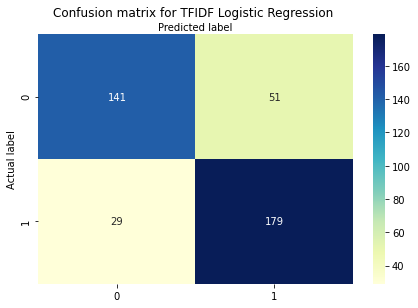

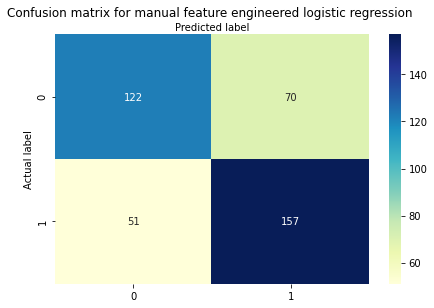

In [13]:
#TODO: your code goes here
 
#Confusion Matrix for TFIDF Logistic regression 
cnf_matrix_TFIDF = metrics.confusion_matrix(y_dev,y_pred_dev)


#visualise matrix heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix_TFIDF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for TFIDF Logistic Regression ')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#classification report for TFIDF Logistic Regression 
TFIDF_report = metrics.classification_report(y_dev,y_pred_dev)
print(TFIDF_report)

#Confusion Matrix for manual feature engineered logistic regression 
cnf_matrix_manual  = metrics.confusion_matrix(y_dev,y_dev_pred)
cnf_matrix_manual 

#visualise matrix heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix_manual), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for manual feature engineered logistic regression ')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#classification report for manual feature engineered Logistic Regression 
manual_report = metrics.classification_report(y_dev,y_dev_pred)
print(manual_report)

##print out 10 and then comment 

<hr />

## Q3: Define an NLP Problem [20 marks]

1. Write down the *problem statement*
1. Define the data *inputs* and *outputs*
1. What is the task structure? Is it similar to an existing NLP task you have heard of? If so, are there any sources of data you could use initially?
1. Design a **very quick** prototype of your idea for a **data annotation interface**. You can use tools such as:
    * Paper and pen
    * Spreadsheets (e.g. GSheets, Excel, etc)
    * Presentation software (e.g. GSlides, Powerpoint, Keynote, etc)
    * Rapid Prototyping apps (e.g. Adobe XD, [Mockplus](https://www.mockplus.com/free-wireframing-tool/), [Sketchappsources](https://www.sketchappsources.com/), etc)
    * Anything else!
    * **Make sure to upload your prototype interface somewhere that it can easily be shared and include a link to it in your description**
1. Briefly describe how you might approach modelling the problem

#### Q3.1: Problem Statement

With the recent release of series 3 of the Netflix series 'Formula 1:Drive to Survive', analysts at Netflix are attempting to perform a metaphorical litmus test of opinion on the series. It is important to specifically gauge opinion on the new series on social media platforms as the sport is looking to increase its fanbase amongst the younger generations and their opinion is most prevelant on social media. The analysts will be using sentiment analysis to extract the reaction to the new episodes by detecting positive semtiment within tweets on Twitter. So the task is to classify tweets about the show as positive, or neutral/negative. 

#### Q3.2: Inputs and Outputs

The data for this task will be collated via a web scrape, utilising a Twitter API. The API will allow programmatic access to live tweets. Queries can be tailored so that all tweets will the hashtag #F1 Drive to Survive to make sure tweets are concerning the appropriate topic. 

The tweets, once cleaned and feature engineered, a training set of the data will be used as the inputs. The cleaning process and feature engineering will be elaborated on in the following section. The output will consist of labels manually assigned to each tweet, 1 for postive sentiment and 0 for neutral or negative sentiment. The labelling processing and crowdsourcing resources required will be elaborated on in the following section. 



#### Q3.3: Task Structure

In many ways, this problem is similiar to many other sentiment analysis problems. These method's are employed in a variety of contexts; whether it be  identifying hate speech on social media platforms or  intelligence agencies identifying suspicious activity on online forums. 

The task will follow this structure:
1. Scraping Data
2. Labelling Data 
3. Cleaning Data 
4. Feature Extraction 
5. Model Building - Sentiment Analysis 



1. **Scraping Data**

Tweets will be scraped using a Twitter API. The query submitted will specify the hastag "#f1 drive to survive.

2. **Labelling data**

As we will be manually labelling the sentiment of each tweet scraped, crowdsourcing methods are required to make the labelling process feasible. We will use Amazon Mechinical Turk (mTurk). This is an online platform for paid labelling of our data. Those being employed to label the data, will use a prodi.gy data annotation interface for a binary text classification purposes. The data will be loaded, and the input tweets/ data can be classed by the user as positive, negative or neutral sentiment towards the new series of the show

3. **Cleaning Data**

Cleaning of the data is next and is important in order to extract features from the data. First twitter handles/ any words begining with an '@' are removed using a remove pattern function. Punctuations, numbers and special characters  will be removed. The shortened sentences will be tokenised and stemmed so that variations of words are not missed later when it comes to positivity scoring. 


4. **Feature Extraction** 

As we will be comparing multiple models, there will be 2 types of feature engineering. The first batch of feature engineering will be to utilise the TFIDF vectorizer. All tokenised input sentences will be vectorised appropriately. 

Simultaneously, we will manually enginner the following features;

- Sentence postivity ( importing positive and negative word packages)
- sentence length 
- number of stop words. 

The tokenised sentences wil be engineered into vectors appropriate for modelling. 

5. **Model Building**

The model building is elaborated on in the following section 



#### Q3.4: Interface Prototype

The data annotation interface that will be used to label the input data/ tweets will be prodi.gy. Prodi.gy will be set to be a binary text classifier. The data will be loaded, and the input tweets/ data can be classed by the user as positive, negative or neutral sentiment towards the new series of the show.  Attatched is an annoted example showing what the interface would look like. 
https://drive.google.com/file/d/1I4uvpcrZviOkUPCgBbNPnCD4WfoS52rO/view?usp=sharing

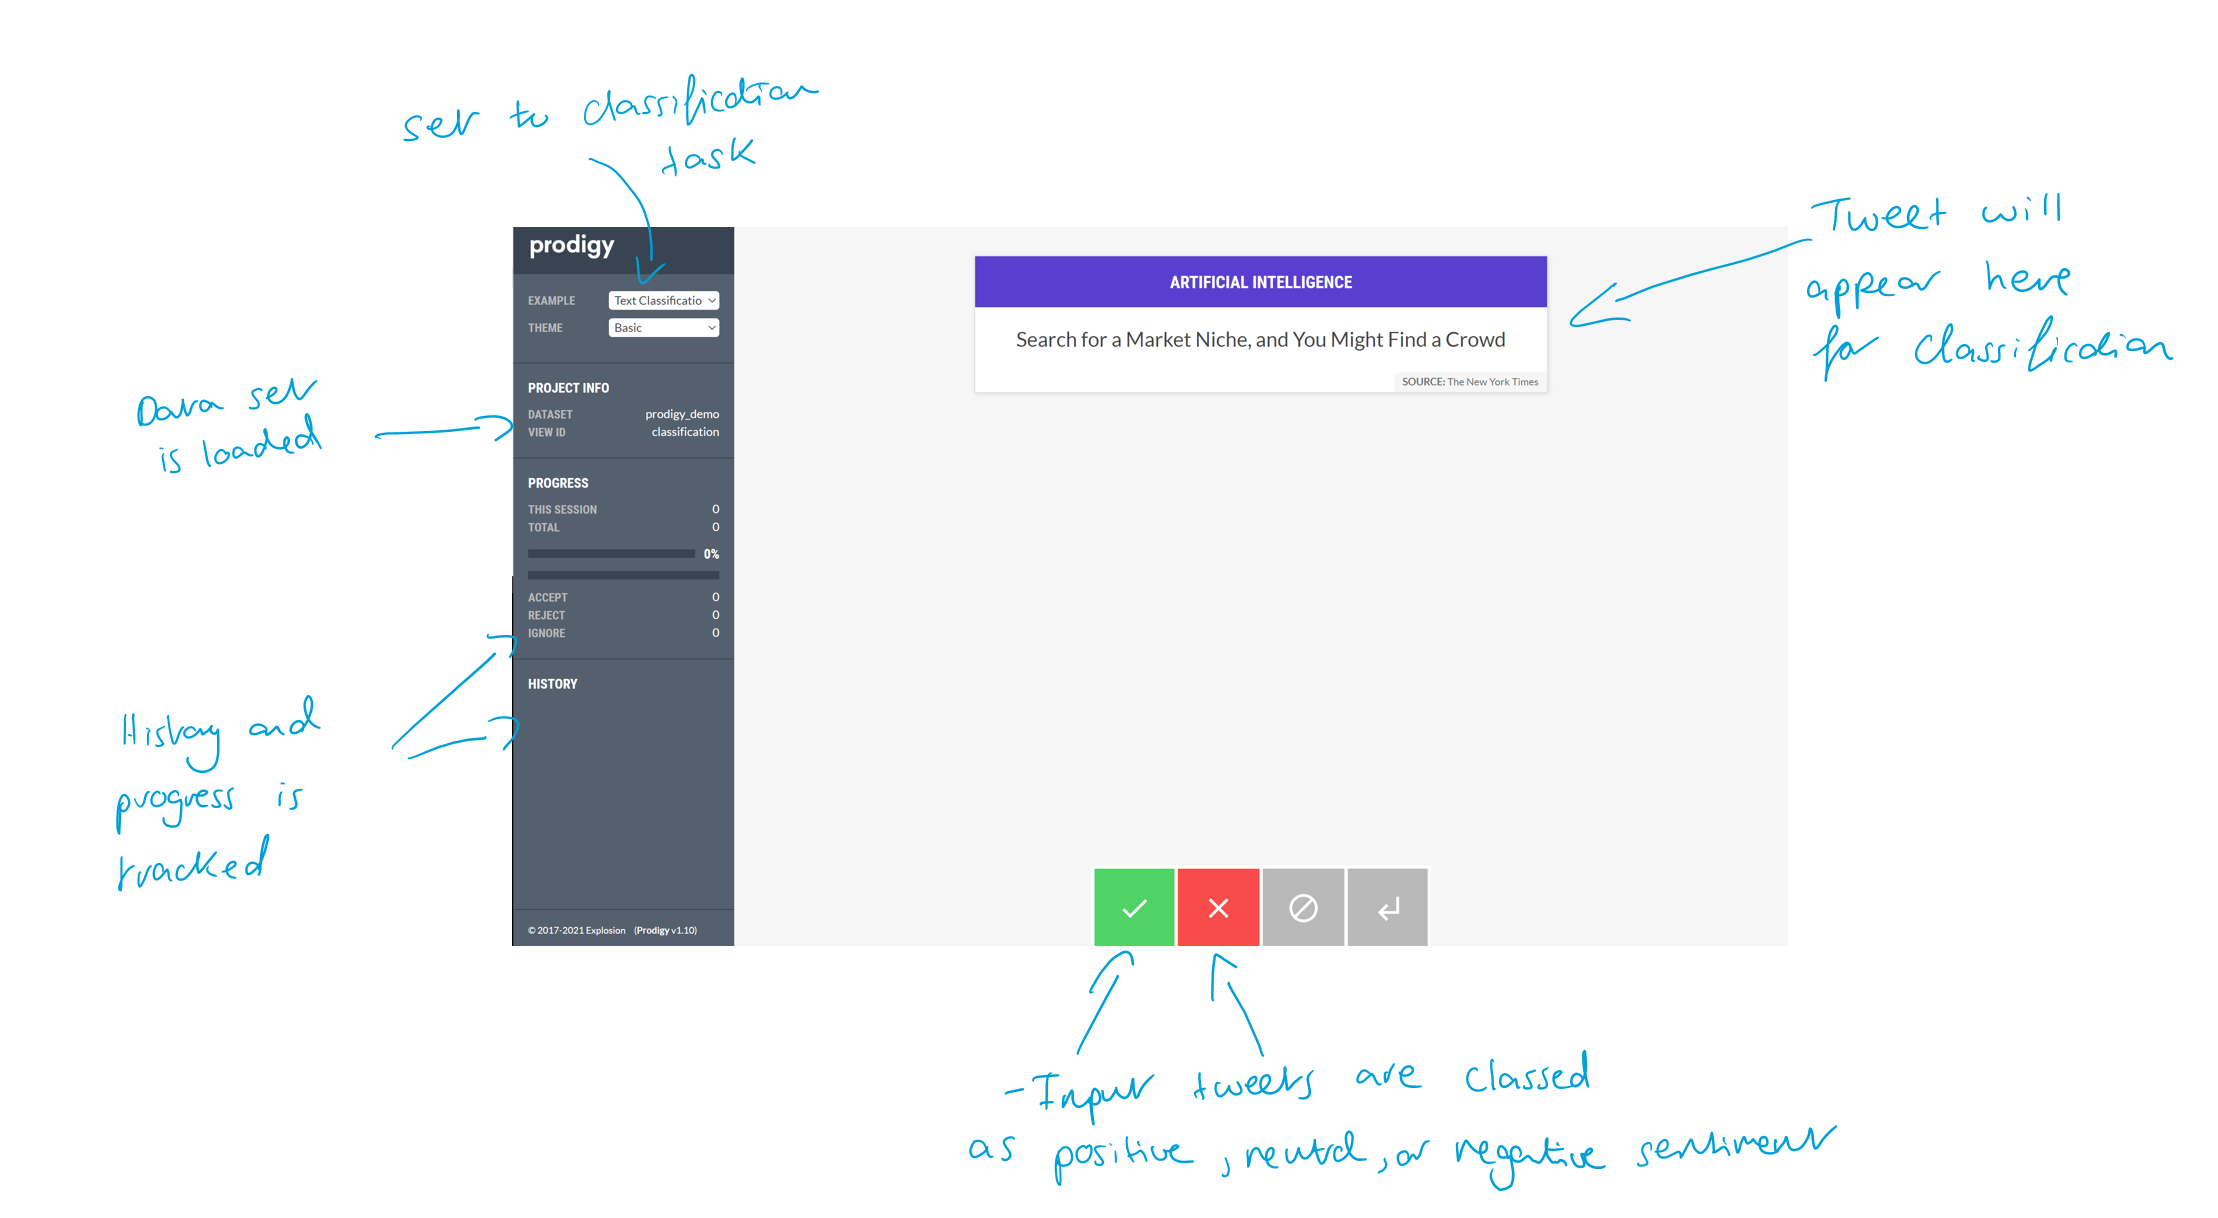


#### Q3.5: Modelling Approach

The data, once engineered will be split into training, validation and test sets. Both training sets of TFIDF vectorised manually engineered data will be trained on a pre trained BERT model - with hugging face transformers used to fine tune the model for our sentiment analysis task.

The model performance will be compared for each set of data and the data with best performing model on the validation set will be employed for the task.

Once the best combination of data and model is selected, the model will be tested on test data. The model, with accuracy and f1 above 85% will be able to be employed on live twitter data to register numbers of positive tweets about the programme vs negative and neutral tweets about the new series release. 

<hr />

## Q4: Be the Adversary [10 marks (+ potentially 5 bonus marks)]
This question is designed to provide you with examples of the capabilities of state-of-the-art NLP models, as well as some intuition to how they work, and in particular where their weaknesses may lie.

### Q4.1: Adversarial Human Annotation for Reading Comprehension [10 marks]
#### Setup Instructions:
1. Access [Dynabench](https://dynabench.org/) (feel free to create an account to easily track your examples)
1. Navigate to "Tasks -> Question Answering -> Create Examples"
1. Try to beat the AI!

#### Your Challenge:
Try to **identify a pattern (or patterns) of weakness** that the model is susceptible to (feel free to use the "Inspect" button to see which passage tokens the model is giving most importance when answering the question). If you don't manage to identify any patterns in particular, provide a few examples of questions the model could not answer and the model predictions, and explain why you think the model might have found those examples challenging (based on your learnings so far).

Briefly describe your findings in the cell below.

**Answer**

Initial attempts to find weakness in the ensemble of RoBERTa models trained on SQuAD v1.1 and data from previous Beat the AI rounds using questions with no synonyms proved seemingly futile. 


Next, the ambiguity within the questions was increased. 
Questions included;
- Name an animal phylum less complex than jellyfish but not less complex than most other animals ?
-How could you describe the accent of an American citizen who pronounced New York as ' New Yawk'?

These questions were used to induce a comparative nature to the questioning, but where dealt with upwards of 80% confidence by the model. 

However, we increased the diversity, the comparative nature of the question, the frequency of synonyms and required background knowledge. These lines of questioning tricked the model with great efficacy. 

**Examples**

- **Which year, was it not possible to visit northern East Prussia?** The real answer is 1948 but the model answered 1946. This question was an example of increased diversity, as the passage stated that northern East Prussia was known by a different name after 1948. 

-  What became a key feature for OpenType before the death of Princess Diana?  The real answer to this questionw as ACE. However, the question was able to trick thge model with the input of background knowledge. This theme on introducing background knowledge into the line of questioning was further explored. 

- **During the Falkands defence, the British Military used professional soldiers, which tribe can we confidently say didn’t use them?** This question is another example of where we introduced background information to fool the model, so it would place excess importance on the background information as appose to the real question. The passage described a certain tribe of people not a having professional infantry. The use of synonyms may have played a further role as well. 




- **The titanic was sunk by an object greater than 19,000 sq mi… what can we confidently call that object?** The passage described Glacial Icebergs as being greater than 15,000 sq mi in size, however with the use of a comparison within the line of questioning, the model was unable to return the correct answer of 'Glacier'. Combined with background information in the questioning, the model was unable to predict the right answer with 35% confidence. 




## Q4.2: Word Adversaries for Sentiment Classification [Optional, up to 5 bonus marks]
In this question, you will attempt to create your own adversarial examples against an NLP model trained to classify sentiment of movie reviews. **However**, this will prove more challenging than the previous question as you will be **restricted to only making word-level edits to the input**.

#### Setup Instructions:
This question has four sub-tasks revolving around adversarial example generation:

1. **Task 1**: you will simply be asked to write movie reviews that should **NOT** be misclassified by the model.
2. **Task 2**: you will be asked to repeat the first task with one crucial difference: this time you should write an adversarial example. This means given a specific sentiment (positive or negative), you are asked to write a movie review with that sentiment, but the model should misclassify it.
3. **Task 3**: you will be given a set of existing movie reviews and you have to change individual words in order to make the model misclassify the reviews. You can replace words with other words without the need to preserve the actual meaning of the review. This means that you can, for example, replace the word *good* with *terrible*.
4. **Task 4**: you will be asked to generate a word-level adversarial attack. This task is similar to the third task, however, you must not make changes that alter the review's actual meaning. That means you are only allowed to make changes that **preserve the review's semantics** (e.g., by changing the word *great* to *excellent*). 

**Note**: you are advised to save your adversarial examples before you submit them in the online study. You can do this by simply copy-and-pasting them to a local document.

#### Your Challenge:
Briefly explain how you approached each of the four tasks. To successfully explain your strategy, it is advised that you document some of the adversarial examples that you create and present them to us in your description. In particular, for the different sub-tasks:
* For task 1, explain why you think that your model predicted the respective sentiments.
* For task 2, explain how you tried to fool the model. What strategies did you use to create your adversarial examples?
* For task 3, which words did you target for replacement, and which words you did you use as your substitutions? And why?
* For task 4, was this task more or less difficult than task 3? Why do you think this was the case from a modelling perspective?


#### Let's Go:

The online study can be accessed at http://compass.cs.ucl.ac.uk/humanadversaries. Detailed instructions will be provided in the online interface.

If you have any questions about this study, please contact Maximilian Mozes ([m.mozes@cs.ucl.ac.uk](mailto:m.mozes@cs.ucl.ac.uk)).

Briefly describe your findings in the cell below.

<hr />

## Q5: Text Similarity [15 marks]
- Notebook 

For this question, we recommend using the `flair` library, although you may use any library of your choice as long as it runs properly within this notebook on Colab.

You will be given two sentences `She went for a walk in the park by the river bank` and `The woman went strolling on the grass next to the stream`, and asked to investigate the similarity between the two using different word embeddings.

In [14]:
# Install and use the flair library
# https://github.com/zalandoresearch/flair
import warnings
warnings.filterwarnings("ignore")
try:
  import flair
  assert flair.__version__ == '0.8', f"flair version is {flair.__version__}"
except ModuleNotFoundError or AssertionError:
  !pip install flair==0.8.0
  !pip install allennlp==0.9.0
  import flair

from flair.data import Sentence
from flair.embeddings import WordEmbeddings, ELMoEmbeddings, TransformerWordEmbeddings, TransformerDocumentEmbeddings

     |████████████████████████████████| 286kB 10.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 18.7MB/s 
     |████████████████████████████████| 798kB 55.1MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 983kB 55.8MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 1.2MB 44.8MB/s 
     |████████████████████████████████| 3.2MB 49.5MB/s 
     |████████████████████████████████| 890kB 39.3MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=662b79dec77e08567150633e83515b657519e0ae5c09d65d8d5d47f35dbe382f
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp37-none-any.whl size=14376 sha2

In [15]:
# Preparing the sentences [do not change!]
sentence_1 = "She went for a walk in the park by the river bank"
sentence_2 = "The woman went strolling on the grass next to the stream"

### Q5.1: Calculate Cosine Similarity [2 marks]
Create a function called `get_similarity` which calculates the cosine similarity between two word embeddings as a score between `0` and `1`. You may use any libraries you like to support this.


In [16]:
#TODO: complete the function below
def get_similarity(embedding_1:np.array, embedding_2:np.array) -> float:
  return float(cosine_similarity(embedding_1.reshape(1, -1), embedding_2.reshape(1, -1)))
  
  # cos_sim = np.dot(embedding_1, embedding_2.T)/(np.linalg.norm(embedding_1)*np.linalg.norm(embedding_2))
  # return cos_sim


  # cos_sim = dot(embedding_1,embedding_2)/(norm(embedding_1)*norm(embedding_2))
  # return cos_sim 

  
  
  
 

embedding_1 = np.array([1, 1, 1, 1, 0, 0])
embedding_2 = np.array([0, 1, 1, 0, 1, 0])
print(get_similarity(embedding_1, embedding_2))  # should print 0.57735...
print(get_similarity(embedding_2, embedding_1))  # should print 0.57757...

0.5773502691896258
0.5773502691896258


### Q5.2: Calculate the similarity between TFIDF representations [2 marks]
Obtain TFIDF representations for the two sentences (treat the two as your corpus). Calculate the cosine similarity between the two and store it in a variable called `similarity_tfidf`.


In [17]:
#TODO: your code goes here
vectorizer = TfidfVectorizer()
corpus = [sentence_1, sentence_2]
embedding = vectorizer.fit_transform(corpus)
similarity_tfidf = get_similarity(embedding[0], embedding[1])
print(similarity_tfidf)

0.31441335589027025


### Q5.3: Calculate the similarity between mean GloVe embeddings [2 marks]
Obtain GloVe embeddings for the two sentences (use the mean of the GloVe word embeddings as the sentence representations). Calculate the cosine similarity between the two and store it in a variable called `similarity_glove`.


In [18]:
#TODO: your code goes here

glove = WordEmbeddings('GloVe')
sent_1 = flair.data.Sentence(sentence_1)
sent_2 = flair.data.Sentence(sentence_2)

glove.embed(sent_1)
glove.embed(sent_2)


embedding_1 = []
embedding_2 = []
for token in sent_1:
    embedding_1.append(token.embedding.mean())

for token in sent_2:
    embedding_2.append(token.embedding.mean())

embedding_1 = np.array(embedding_1)
embedding_2 = np.array(embedding_2 + [0])




similarity_glove = get_similarity(embedding_1, embedding_2)
print(similarity_glove)


2021-03-23 20:01:16,008 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpt0vk9cd0


100%|██████████| 160000128/160000128 [00:04<00:00, 38330458.94B/s]

2021-03-23 20:01:20,269 copying /tmp/tmpt0vk9cd0 to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2021-03-23 20:01:20,515 removing temp file /tmp/tmpt0vk9cd0
2021-03-23 20:01:20,872 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpfkyftiap


100%|██████████| 21494764/21494764 [00:00<00:00, 32866621.40B/s]

2021-03-23 20:01:21,599 copying /tmp/tmpfkyftiap to cache at /root/.flair/embeddings/glove.gensim
2021-03-23 20:01:21,630 removing temp file /tmp/tmpfkyftiap


-0.05504035622074767


### Q5.4: Calculate the similarity between mean ELMo embeddings [2 marks]
Obtain ELMo embeddings (use the `small` version in `flair`) for the two sentences (use the mean of the ELMo word embeddings as the sentence representations). Calculate the cosine similarity between the two and store it in a variable called `similarity_elmo`.


In [19]:
#TODO: your code goes here
 

elmo = ELMoEmbeddings('small')
elmo_sent_1 = flair.data.Sentence(sentence_1)
elmo_sent_2 = flair.data.Sentence(sentence_2)

elmo.embed(elmo_sent_1)
elmo.embed(elmo_sent_2)


elmo_embedding_1 = []
for token in elmo_sent_1:
    elmo_embedding_1.append(token.embedding.mean())

elmo_embedding_2 = []
for token in elmo_sent_2:
    elmo_embedding_2.append(token.embedding.mean())

elmo_embedding_1 = np.array(elmo_embedding_1)
elmo_embedding_2 = np.array(elmo_embedding_2 + [0])


similarity_elmo = get_similarity(elmo_embedding_1, elmo_embedding_2)
print(similarity_elmo)






100%|██████████| 54402456/54402456 [00:05<00:00, 10667073.14B/s]


0.5610835443355856


### Q5.5: Calculate the similarity between BERT document embeddings [2 marks]
Obtain BERT **document** embeddings (use the `bert-base-uncased` model) for the two sentences (note that we are no longer doing mean pooling for this question). Calculate the cosine similarity between the two and store it in a variable called `similarity_bert`.


In [20]:
#TODO: your code goes here
bert = TransformerWordEmbeddings('bert-base-uncased')
sent_1 = flair.data.Sentence(sentence_1)
sent_2 = flair.data.Sentence(sentence_2)

bert.embed(sent_1)
bert.embed(sent_2)


embedding_1 = []
embedding_2 = []
for token in sent_1:
    embedding_1.append(token.embedding.mean())

for token in sent_2:
    embedding_2.append(token.embedding.mean())


embedding_1 = np.array(embedding_1)
embedding_2 = np.array(embedding_2 + [0])


similarity_bert = get_similarity(embedding_1, embedding_2)
print(similarity_bert)


0.9356291639429436


### Q5.6: Analysis [5 marks]
Experiment with different sentences. Compare and contrast - for example, what can you say about comparing similarities when using different representations? What about when using the same representation type (e.g. GloVe) but using different sentences? If you had to build a text similarity system, what would you propose using?

Report on your findings below.


With the use of different sentences, we can see the stark difference in similarity scores within some representation types.

- The TFDIF cosine similarity score decreases compared to the similarity  previous sentences. The score decreases from 0.3144 to 0.2244.

- The Glove representation type for these two sentences changes dramatically to the previous sentences and has a similarity of 0.9356, compared to -0.055.

- The BERT similarity score remains high at 0.9356 when compared to the score induced from the previous two sentences. 

- The ELMO similarity score remains near the same value induced from the previous sentences at 0.5775. 

To conclude, when building a text similarity system, I would propose using BERT embeddings. Firstly because BERT models cant use GloVe embeddings due to its segmentation of its input into subword units. Whereas GloVe utilises traditional word-like tokens. 

Secondly, BERT generates word embeddings for a word that captures the context of a word based on its position in a sentence, wheras GloVe word embeddings are context independent and output just one vector. 







In [21]:
# Preparing the new sentences 
sentence_3 = "He bought a coffee to avoid doing his work"
sentence_4 = "He went to a cafe to waste time"

In [22]:
#TFIDF
vectorizer = TfidfVectorizer()
corpus = [sentence_3, sentence_4]
embedding = vectorizer.fit_transform(corpus)
similarity_tfidf = get_similarity(embedding[0], embedding[1])
print(similarity_tfidf)

#Glove
glove = WordEmbeddings('GloVe')
sent_3 = flair.data.Sentence(sentence_3)
sent_4 = flair.data.Sentence(sentence_4)
glove.embed(sent_3)
glove.embed(sent_4)

embedding_3 = []
embedding_4 = []
for token in sent_1:
    embedding_3.append(token.embedding.mean())

for token in sent_2:
    embedding_4.append(token.embedding.mean())

embedding_3 = np.array(embedding_3)
embedding_4 = np.array(embedding_4 + [0])

similarity_glove = get_similarity(embedding_3, embedding_4)
print(similarity_glove)


#BERT
bert = TransformerWordEmbeddings('bert-base-uncased')
sent_3 = flair.data.Sentence(sentence_3)
sent_4 = flair.data.Sentence(sentence_4)

bert.embed(sent_3)
bert.embed(sent_4)


embedding_3 = []
embedding_4 = []
for token in sent_3:
    embedding_3.append(token.embedding.mean())

for token in sent_4:
    embedding_4.append(token.embedding.mean())


embedding_3 = np.array(embedding_3)
embedding_4 = np.array(embedding_4 + [0])


similarity_bert = get_similarity(embedding_3, embedding_4)
print(similarity_bert)


#ELMO

elmo = ELMoEmbeddings('small')
elmo_sent_3 = flair.data.Sentence(sentence_3)
elmo_sent_4 = flair.data.Sentence(sentence_4)

elmo.embed(elmo_sent_3)
elmo.embed(elmo_sent_4)


elmo_embedding_3 = []
for token in elmo_sent_3:
    elmo_embedding_3.append(token.embedding.mean())

elmo_embedding_4 = []
for token in elmo_sent_4:
    elmo_embedding_4.append(token.embedding.mean())

elmo_embedding_3 = np.array(elmo_embedding_3)
elmo_embedding_4 = np.array(elmo_embedding_4 + [0])


similarity_elmo = get_similarity(elmo_embedding_3, elmo_embedding_4)
print(similarity_elmo)

0.22441294385136584
0.9356291639429436
0.9394384905438842
0.5775533865492557


<hr />

## Q6: Modelling in PyTorch [20 marks]
Put your knowledge to the test! Implement an MLP in any ML library (we'd recommend PyTorch - refer to the lecture slides) on the SST-2 dataset which is already loaded into this notebook (refer to question 2).

### Your tasks include:
1. Optimize your model for best performance on the validation set
1. Show a plot of your model training and validation loss during training
1. Show a plot of your model training and validation accuracy during training
1. Explain where you might want to stop the model training and why
1. Provide your model's best accuracy on the test set
1. Perform an error analysis and compare to the models investigated in **question 2**

Make sure to explain the steps you went through and your observations.

**Answer**

The best performance of the model on the validations set was 77.52% accuracy. The model induced a test accuracy score of 75.23%. 

The plots, at in the output of the cell below, show that the optimal time to stop training woul dbe after the 6th epoc. This is because at the 6th epoc, the validation loss begins to increase, and it is in close proximity to the point at which the validation accuracy is the highest. 

In [23]:
# Define where the data is located

path_train = "https://drive.google.com/uc?id=1IsO72aOzjx-6eu2Z5VOaXZBShatNxBaj"
path_dev = "https://drive.google.com/uc?id=1tUiTEzR14wmYTdr0mYEKaDbj9-pN05-u"

# Load in the train and dev data
df_train = pd.read_csv(path_train, sep='\t')
df_dev_orig = pd.read_csv(path_dev, sep='\t')
df_dev, df_test = train_test_split(df_dev_orig, test_size=0.5, shuffle=True, random_state=RAND_SEED)

#define training, development and test sets
X_train, y_train = df_train["sentence"].values, df_train["label"].values
X_dev, y_dev = df_dev["sentence"].values, df_dev["label"].values
X_test, y_test = df_test["sentence"].values, df_test["label"].values

The binary cross-entropy loss of our model is 0.7121.
The model's accuracy score is 44.34%
Epoch 0: Train loss: 0.675438
Epoch 1: Train loss: 0.584183
Epoch 2: Train loss: 0.545827
Epoch 3: Train loss: 0.538224
Epoch 4: Train loss: 0.536835
Epoch 5: Train loss: 0.536399
Epoch 6: Train loss: 0.536249
Epoch 7: Train loss: 0.536000
Epoch 8: Train loss: 0.535552
Epoch 9: Train loss: 0.535279
Epoch 10: Train loss: 0.535202
Epoch 11: Train loss: 0.534829
Epoch 12: Train loss: 0.534584
Epoch 13: Train loss: 0.534381
Epoch 14: Train loss: 0.534050
Epoch 15: Train loss: 0.533993
Epoch 16: Train loss: 0.533907
Epoch 17: Train loss: 0.533633
Epoch 18: Train loss: 0.533530
Epoch 19: Train loss: 0.533449
The binary cross-entropy loss of our model is 0.5336.


.vector_cache/glove.6B.zip: 0.00B [00:00, ?B/s]

The model's accuracy score is 71.77%


.vector_cache/glove.6B.zip: 862MB [02:43, 5.28MB/s]                           
100%|█████████▉| 399624/400000 [00:22<00:00, 17804.59it/s]


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 01 | Train Loss: 0.706 | Train Acc: 45.50% | Val. Loss: 0.687 | Val. Acc: 52.77%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 02 | Train Loss: 0.683 | Train Acc: 55.35% | Val. Loss: 0.680 | Val. Acc: 50.77%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 03 | Train Loss: 0.666 | Train Acc: 56.52% | Val. Loss: 0.643 | Val. Acc: 66.31%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 04 | Train Loss: 0.629 | Train Acc: 63.98% | Val. Loss: 0.605 | Val. Acc: 68.53%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 05 | Train Loss: 0.565 | Train Acc: 72.75% | Val. Loss: 0.596 | Val. Acc: 68.75%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 06 | Train Loss: 0.484 | Train Acc: 81.45% | Val. Loss: 0.606 | Val. Acc: 72.57%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 07 | Train Loss: 0.411 | Train Acc: 87.65% | Val. Loss: 0.638 | Val. Acc: 73.77%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 08 | Train Loss: 0.354 | Train Acc: 91.85% | Val. Loss: 0.716 | Val. Acc: 75.32%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 09 | Train Loss: 0.307 | Train Acc: 94.42% | Val. Loss: 0.803 | Val. Acc: 75.63%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 10 | Train Loss: 0.272 | Train Acc: 95.75% | Val. Loss: 0.864 | Val. Acc: 74.43%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 11 | Train Loss: 0.243 | Train Acc: 96.97% | Val. Loss: 0.971 | Val. Acc: 73.85%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 12 | Train Loss: 0.219 | Train Acc: 97.50% | Val. Loss: 0.917 | Val. Acc: 74.74%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 13 | Train Loss: 0.199 | Train Acc: 97.90% | Val. Loss: 1.065 | Val. Acc: 74.07%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 14 | Train Loss: 0.184 | Train Acc: 98.35% | Val. Loss: 1.113 | Val. Acc: 74.52%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 15 | Train Loss: 0.170 | Train Acc: 98.55% | Val. Loss: 1.184 | Val. Acc: 74.16%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 16 | Train Loss: 0.157 | Train Acc: 98.80% | Val. Loss: 1.239 | Val. Acc: 73.94%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 17 | Train Loss: 0.148 | Train Acc: 98.85% | Val. Loss: 1.316 | Val. Acc: 73.49%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 18 | Train Loss: 0.139 | Train Acc: 98.88% | Val. Loss: 1.288 | Val. Acc: 74.38%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00

Epoch: 19 | Train Loss: 0.131 | Train Acc: 99.03% | Val. Loss: 1.429 | Val. Acc: 73.49%



Total time elapsed: 00:00:00
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Epoch: 20 | Train Loss: 0.122 | Train Acc: 99.05% | Val. Loss: 1.379 | Val. Acc: 75.14%


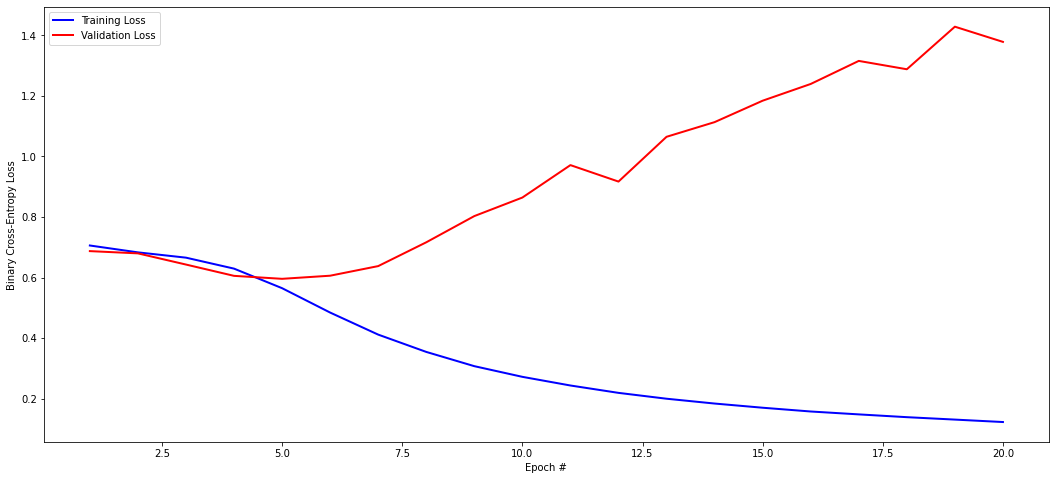

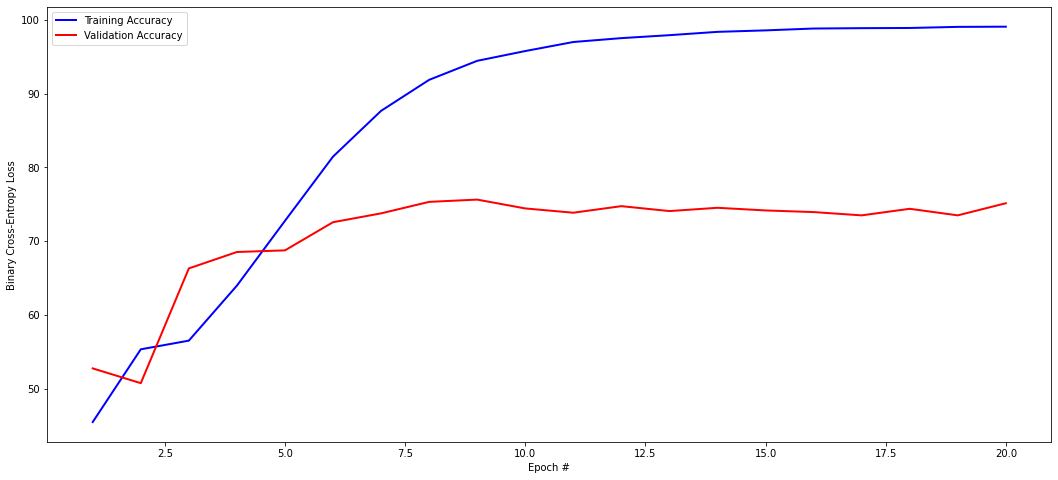

The model's validation accuracy score is 75.23%
The model's test accuracy score is 77.52%


In [24]:
#TODO: your code goes here
# Apply manual feature engineering
import numpy as np
np.random.seed(RAND_SEED)  # set the random seed for reproducibility

def fe_text_len(tokens):
    return len(" ".join(tokens))
    
def fe_positivity(tokens):
    score = 0
    for token in tokens:
        if token in POS_WORDS:
            score += 1
        if token in NEG_WORDS:
            score -= 1
    return score

def tokenise(text):
    return text.split()  # because punctuation is already separated by spaces

def featurise(text):
    tokens = tokenise(text) 
    feature_functions = [fe_text_len, fe_positivity]
    return np.array([fn(tokens) for fn in feature_functions])

# Standardise each feature
def standardise(features):
    features = np.stack(features)
    num_features = features.shape[1]
    standardised_features = []
    for i in range(num_features):
        feature = features[:, i]
        feature_mean = np.mean(feature)
        feature_std = np.std(feature)
        feature = (feature - feature_mean) / feature_std
        standardised_features.append(feature)
    
    return list(zip(*standardised_features))
# Extract the features from the sentences
df_train['input_features'] = df_train['sentence'].apply(featurise)
df_train['input_features_standardised'] = standardise(df_train['input_features'].values)

#Build MLP
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size=1):# initialise with sizes
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size_1  = hidden_size_1
        self.hidden_size_2  = hidden_size_2
        self.output_size = output_size
        
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size_1)
        self.fc2 = torch.nn.Linear(self.hidden_size_1, self.hidden_size_2)
        self.fc3 = torch.nn.Linear(self.hidden_size_2, self.output_size)  # single output node
        
        # Activation functions
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
     #our forawrd function   
    def forward(self, x):
        if type(x) == np.ndarray:
            x = torch.FloatTensor(x)
        hidden_1 = self.fc1(x)
        activation_1 = self.relu(hidden_1)
        hidden_2 = self.fc2(activation_1)
        activation_2 = self.relu(hidden_2)
        output = self.fc3(activation_2) 
        output = self.sigmoid(output)  # Now we have probabilities
        return output
    
    def predict(self, x, threshold=0.5):
        return (self.forward(x) >= threshold).float() * 1

# Define Helper functions
def predict(probabilities, threshold=0.5):
    return (probabilities >= threshold).float() * 1


# Compute the accuracy score
def accuracy(y_true: list, y_pred: list) -> int:
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length"
    num_correct = 0
    for y_t, y_p in zip(y_true, y_pred):
        if y_t == y_p:
            num_correct += 1
    return 100*num_correct / len(y_true)




X_train, y_train = np.stack(df_train['input_features_standardised'].values), df_train['label'].values



# Define the model, loss function and optimizer
model = MLP(input_size=2, hidden_size_1=5, hidden_size_2=5, output_size=1)
criterion = torch.nn.BCELoss()  # binary cross-entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #use Adam which builds on gradient descent. Lr is a parameter we can change !

# Evaluate our model's performance before training
model.eval()  # we need to put the model into eval mode so that it does not update the gradients
y_pred_proba = model(torch.FloatTensor(X_train))
y_pred = predict(y_pred_proba)
before_train = criterion(y_pred_proba.squeeze(), torch.FloatTensor(y_train))

print("The binary cross-entropy loss of our model is {:.4f}.".format(before_train))
print("The model's accuracy score is {:.2f}%".format(accuracy(y_train, y_pred.squeeze())))




#Train the model !!
# We'll use the PyTorch DataLoader for organising our data into mini-batches
from torch.utils.data import DataLoader

batch_size = 4000 #change this size!
# Note that we are training on the full dataset
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True)


# Train the model
def train(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()  # tells PyTorch that the model is in training modes
    for epoch in range(num_epochs):
        train_loss = 0.0
        for data, target in train_loader:  # every batch
            data, target = data.float(), target.float()
            optimizer.zero_grad()  # clear the gradients of all optimized variables
            # Forward pass
            y_pred_proba = model(data)  # probability
            # Compute Loss
            loss = criterion(y_pred_proba.squeeze(), torch.FloatTensor(target))
            # Backward pass
            loss.backward()
            optimizer.step()
            # Update the running training loss
            train_loss += loss.item()*data.size(0)
            
        # Calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        if not epoch % 1:
            
            print('Epoch {}: Train loss: {:.6f}'.format(epoch, train_loss))
        
train(model, train_loader, criterion, optimizer)

# Evaluate our model's performance after training
model.eval()  # we need to put the model into eval mode so that it does not update the gradients
y_pred_proba = model(torch.FloatTensor(X_train))
y_pred = predict(y_pred_proba)
after_train = criterion(y_pred_proba.squeeze(), torch.FloatTensor(y_train))

print("The binary cross-entropy loss of our model is {:.4f}.".format(after_train))
print("The model's accuracy score is {:.2f}%".format(accuracy(y_train, y_pred.squeeze())))



#Beginning of emedding model 
TEXT = data.Field(sequential=True, tokenize=tokenise)
LABEL = data.LabelField(dtype=torch.long, sequential=False)


# Helper classes to allow loading of dataframes into torchtext datasets
# Sourced from: https://stackoverflow.com/questions/52602071/dataframe-as-datasource-in-torchtext
class DataFrameDataset(Dataset):
    """Class for using pandas DataFrames as a datasource"""

    def __init__(self, examples, fields, filter_pred=None):
        """
        Create a dataset from a pandas dataframe of examples and Fields
        Arguments:
            examples pd.DataFrame: DataFrame of examples
            fields {str: Field}: The Fields to use in this tuple. The
                string is a field name, and the Field is the associated field.
            filter_pred (callable or None): use only exanples for which
                filter_pred(example) is true, or use all examples if None.
                Default is None
        """
        self.examples = examples.apply(SeriesExample.fromSeries, args=(fields,), axis=1).tolist()
        if filter_pred is not None:
            self.examples = filter(filter_pred, self.examples)
        self.fields = dict(fields)
        # Unpack field tuples
        for n, f in list(self.fields.items()):
            if isinstance(n, tuple):
                self.fields.update(zip(n, f))
                del self.fields[n]


class SeriesExample(Example):
    """Class to convert a pandas Series to an Example"""
    @classmethod
    def fromSeries(cls, data, fields):
        return cls.fromdict(data.to_dict(), fields)

    @classmethod
    def fromdict(cls, data, fields):
        ex = cls()

        for key, field in fields.items():
            if key not in data:
                raise ValueError("Specified key {} was not found in "
                                 "the input data".format(key))
            if field is not None:
                setattr(ex, key, field.preprocess(data[key]))
            else:
                setattr(ex, key, data[key])
        return ex


# Loading train, validation and test data
# For faster training we use num_examples=10000, in practice we would obviously use all the available data
num_examples = 4000  # None
dfd_train = DataFrameDataset(df_train[:num_examples], fields={'sentence': TEXT, 'label': LABEL})
dfd_dev = DataFrameDataset(df_dev, fields={'sentence': TEXT, 'label': LABEL})
dfd_test = DataFrameDataset(df_test, fields={'sentence': TEXT, 'label': LABEL})
#build vocab with glove embeddings
TEXT.build_vocab(dfd_train, max_size=20000, vectors="glove.6B.100d")
LABEL.build_vocab(dfd_train)

# Override the LABEL vocab
from collections import defaultdict
LABEL.vocab.stoi = defaultdict(None, {1: 1, 0: 0})


# Define the data iterators
BATCH_SIZE = 50
#speeds up training significantly
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (dfd_train, dfd_dev, dfd_test),
    sort_key=lambda x: len(x.sentence),
    batch_size=BATCH_SIZE
)


# Now we need to modify our MLP with an EmbeddingBag Layer
class MLPEmbedding(torch.nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size_1, hidden_size_2, output_size=1):
        super(MLPEmbedding, self).__init__()
        self.input_size = input_size
        self.embedding_size = embedding_size
        self.hidden_size_1  = hidden_size_1
        self.hidden_size_2  = hidden_size_2
        self.output_size = output_size
        
        self.embedding = torch.nn.EmbeddingBag(input_size, embedding_size)
        self.fc1 = torch.nn.Linear(self.embedding_size, self.hidden_size_1)
        self.fc2 = torch.nn.Linear(self.hidden_size_1, self.hidden_size_2)
        self.fc3 = torch.nn.Linear(self.hidden_size_2, self.output_size)  # single output node
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        embedded = self.embedding(x)
        hidden_1 = self.fc1(embedded)
        activation_1 = self.relu(hidden_1)
        hidden_2 = self.fc2(activation_1)
        activation_2 = self.relu(hidden_2)
        output = self.fc3(activation_2) 
        output = self.sigmoid(output)  # Now we have probabilities
        return output 
    
    def predict(self, x, threshold=0.5):
        return (self.forward(x) >= threshold).float() * 1


INPUT_SIZE = len(TEXT.vocab)
EMBEDDING_SIZE = TEXT.vocab.vectors.shape[1]  # 100

# Define the model
model = MLPEmbedding(INPUT_SIZE, EMBEDDING_SIZE, 5, 5)
model.embedding.weight.data = TEXT.vocab.vectors  # set the model embedding layer weight matrix

# Define the loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) #change learning rate !!


if IN_COLAB:
    !pip install pyprind
import pyprind

def train(model, iterator, criterion, optimizer):
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    bar = pyprind.ProgBar(len(iterator), bar_char='█')
    for batch in iterator:
        optimizer.zero_grad()
        
        predictions = model(batch.sentence.T).squeeze()
        labels = batch.label.float()
        
        loss = criterion(predictions, labels)
        acc = accuracy(predict(predictions), labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc
        bar.update()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    with torch.no_grad():
        bar = pyprind.ProgBar(len(iterator), bar_char='█')
        for batch in iterator:
            predictions = model(batch.sentence.T).squeeze()
            labels = batch.label.float()
            
            loss = criterion(predictions, labels)
            acc = accuracy(predict(predictions), labels)

            epoch_loss += loss.item()
            epoch_acc += acc
            bar.update()
    return epoch_loss / len(iterator), epoch_acc / len(iterator) 


# Train the model
N_EPOCHS = 20
train_losses, valid_losses = [], []
train_accuracy, valid_accuracy =  [], []
test_accuracy = []

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_iterator, criterion, optimizer)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracy.append(train_acc)
    valid_accuracy.append(valid_acc)
    test_accuracy.append(test_accuracy)
    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc:.2f}%')

# Plot the training and validation losses
fig = plt.figure(figsize=(18, 8))
x = list(range(1, 1+len(train_losses)))

plt.plot(x, train_losses, 'b', linewidth=2)
plt.plot(x, valid_losses, 'r', linewidth=2)
plt.xlabel('Epoch #')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()



# Plot the training and validation accuracy
fig = plt.figure(figsize=(18, 8))
x = list(range(1, 1+len(train_accuracy)))

plt.plot(x, train_accuracy, 'b', linewidth=2)
plt.plot(x, valid_accuracy, 'r', linewidth=2)
plt.xlabel('Epoch #')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()



#Error analysis 
# Get the model predictions
def predict_sentiment(sentence):
    model.eval()
    with torch.no_grad():
        tokenised = tokenise(sentence)
        indexed = [TEXT.vocab.stoi[t] for t in tokenised]
        input_tensor = torch.LongTensor(indexed).unsqueeze(1)
        y_pred_proba = model(input_tensor.T).squeeze()
        y_pred = predict(y_pred_proba)
        return int(y_pred.numpy())
#Validation Accuracy 
df_dev_predict = df_dev.copy()
df_dev_predict['prediction'] = df_dev_predict['sentence'].apply(predict_sentiment)
model_val_acc = accuracy(df_dev_predict['label'].values, df_dev_predict['prediction'].values)
print("The model's validation accuracy score is {:.2f}%".format(model_val_acc))

#Test accuracy
df_test_predict = df_test.copy()
df_test_predict['prediction'] = df_test_predict['sentence'].apply(predict_sentiment)
model_test_acc = accuracy(df_test_predict['label'].values, df_test_predict['prediction'].values)
print("The model's test accuracy score is {:.2f}%".format(model_test_acc))




<hr />

## Q7: Multiple Choice Quiz [10 points]

Answer the following questions by selecting the correct answer:

1. What is the Bag-of-Words (BOW) representation of the sentence `I love NLP` given the vocab defined by the tokens `['OOV', 'a', 'I', 'must', 'love']`?
2. What is the seventy-fourth element (index `73`) of the GloVe 6B 100-dimensional word embedding for `language`?
3. You are collecting data for a sentiment classification task. You've asked two expert workers to classify `20` sentences. Both workers agree on `11` positive examples and `4` negative examples. However, **worker A** labels `3` examples positive that **worker B** considered negative, while **worker B** labels `2` examples positive that **worker A** considered negative. What is the value of Cohen's Kappa?
4. In the sentence `I am enjoying this Natural Language Processing assignment`, what type of phrase is `am enjoying`?
5. Which of the following is **not** an example of an **activation function**?
6. What is the purpose of retaining a **held-out test set**?
7. What is the value of the gradient at the steepest point on a **logistic sigmoid curve**?
8. What probability will a non-OOV aware Uniform Language Model assign to the word `NLP` if it's vocabulary consists of the words `['NLP', 'is', 'so', 'intriguing']`?
9. Gradients in a neural network can sometimes be unstable and **vanish** or **explode**. Which of the following is an example of a reasonable way to deal with **exploding gradients**?
10. Which of the following is **not** an example of an **objective (or loss) function**?

In [25]:
#@title Answers { run: "auto" }
Q1 = "[0, 0, 1, 0, 1]" #@param ["Please select..", "[1, 0, 1, 0, 1]", "[0, 0, 1, 0, 1]", "[1, 0, 1]", "[1, 1, 1]", "[0, 0, 0, 1]", "None of the above"]
Q2 = "-0.39014" #@param ["Please select..", "-0.04817", "0.89017", "-0.10938", "0.46719", "-0.39014", "None of the above"]
Q3 = "0.432" #@param ["Please select..", "0.390", "0.432", "0.500", "0.709", "0.782", "None of the above"]
Q4 = "Verb Phrase (VP)" #@param ["Please select..", "Noun Phrase (NP)", "Verb Phrase (VP)", "Prepositional Phrase (PP)", "Determiner (Det)", "Parse Tree", "None of the above"]
Q5 = "None of the above" #@param ["Please select..", "Sigmoid", "ReLU", "Tanh", "Leaky ReLU", "ELU", "None of the above"]
Q6 = "To estimate the model's generalisation capability" #@param ["Please select..", "To allow us to tune hyper-parameters", "To train on if we don't have enough data", "To enable cross-validation", "To be able to show loss plots", "To estimate the model's generalisation capability", "None of the above"]
Q7 = "0.5" #@param ["Please select..", "0.1", "0.25", "0.5", "0.75", "1.0", "None of the above"]
Q8 = "0.25" #@param ["Please select..", "0.1", "0.25", "0.5", "0.75", "1.0", "None of the above"]
Q9 = "Gradient clipping" #@param ["Please select..", "Backpropagation Through Time (BPTT)", "Gradient clipping", "Dropout", "Re-initialisation", "LSTMs", "None of the above"]
Q10 = "Indefinite loss" #@param ["Please select..", "Mean Squared Error (MSE) loss", "Exponential loss", "Indefinite loss", "Hinge loss", "Cross-entropy loss", "None of the above"]

<hr />

# Automatic Evaluation [don't change!]

## Validity Check
This is a way for you to check whether you accidentially renamed answer variables or functions that we will use for automatic evaluation. Note that this is not a comprehensive list and we do not check here whether you accidentially changed the function signatures, so failing this validity check is only a sufficient condition for telling you something went wrong.

In [26]:
# Validity checks
for fn in [
    word_tokenize, 
    remove_stopwords, 
    is_good,
    is_bad,
    get_similarity
    ]:
  assert callable(fn)

for answer in [similarity_tfidf, similarity_glove, similarity_elmo, similarity_bert]:
  assert isinstance(answer, (np.floating, float)), f"{answer} is of type {type(answer)}"

for answer in [Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]:
  assert isinstance(answer, str), f"{answer} is of type {type(answer)}"

print("Validity checks passed!")

Validity checks passed!


<hr />